# J-Quants API Quick Startガイド

In [ ]:
#@title 初期設定＆各種import
#@markdown ←にある▶ボタンを押すとGoogle Colabでコードを実行することができます。

#@markdown まずはこちらのコードを実行し、J-Quants APIを利用するため必要なパッケージをimportしましょう。

import json
import sys
import requests

from IPython.display import display
import pandas as pd

pd.set_option("display.max_columns", None)

API_URL = "https://api.jquants.com"

## Step1：API利用開始までの流れ　※初回のみ実施

J-Quants APIのご利用を検討いただき、ありがとうございます。

**J-Quants APIをご利用いただくには、以下の2つを事前に行っていただく必要がございます。**
 1. [J-Quants Webサイト](https://jpx-jquants.com/)への登録
 2. J-Quants API利用のためのプラン（Free, Light, Standard, Premium）選択

まだ、ご登録もしくはプラン選択がお済みでない方は、まず上記の2項目を行っていただきますようお願いいたします。  
より具体的な手順は[こちら](https://jpx.gitbook.io/j-quants-ja/outline/getstarted)をご参照ください。

##Step2及びStep3：リフレッシュトークン取得 & idToken取得
リフレッシュトークンを取得するには2つの方法があります。
1. J-Quants Webサイトへログインし、リフレッシュトークンを取得するボタンからリフレッシュトークンを取得する方法
2. リフレッシュトークン取得APIを利用し、リフレッシュトークンを取得する方法

以下に記載のどちらかお好みの方法でリフレッシュトークン及びidTokenを取得してください。

In [ ]:
#@title **1.J-Quants Webサイトから取得したリフレッシュトークンを貼り付ける場合**
#@markdown J-Quants Webサイトにて取得したリフレッシュトークンを以下の「ここにtextを挿入」の箇所に貼り付けてください。

refreshtoken = ""#@param {type: "string"}

# idToken取得
res = requests.post(f"{API_URL}/v1/token/auth_refresh?refreshtoken={refreshtoken}")
if res.status_code == 200:
    id_token = res.json()['idToken']
    headers = {'Authorization': 'Bearer {}'.format(id_token)}
    display("idTokenの取得に成功しました。")
else:
    display(res.json()["message"])


#@markdown 上記コードを実行し、**「idTokenの取得に成功しました。」**と表示されれば、J-Quants APIを利用するための準備は完了です。

#@markdown なお、 「Your refresh token may be incorrect or expired.」等のエラーが出力されている場合は、上記で貼り付けたリフレッシュトークンが誤っているか、期限が切れている可能性がございます。

#@markdown その場合はお手数ですが、再度リフレッシュトークンをJ-Quants Webサイトから取得いただき、再度実行してください。


###**2. J-Quants Webサイトに登録したID及びPWを使用し、RefreshToken及びidTokenをAPIを利用して取得する場合**

In [ ]:
#@title Google Driveのマウント

#@markdown 登録いただいたIDやPWを直接本Notebookに記載するのはセキュリティ上適切ではない可能性があるため、<br>
#@markdown Google Driveに設定ファイルを作成し、当該設定ファイルにIDやPWを記載することをおすすめします。

#@markdown 本コードを実行し、まずはGoogle Driveをマウントします。


from google.colab import drive

try:
    drive.mount('/content/drive')
except:
    print("Google Driveのマウントに失敗しました。")
else:
    print("Google Driveのマウントに成功しました。")

#### 設定ファイルの作成（初回のみ）
- 以下の画像のように 「drive→MyDrive→drive_ws→secret→jquants-api.toml」といった階層で設定ファイルを作成します。

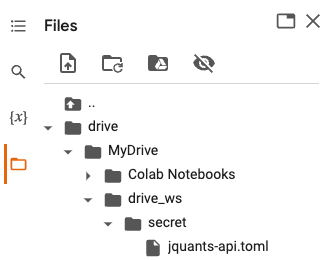

- 作成したtomlファイルに以下のサンプルのとおりID及びパスワードを記載します。  
(なお、\*の箇所はご登録いただいたID及びPWに置き換えてください。)

```
[jquants-api-client]
mailaddress = "*****@***.***"
password = "**************"
```

In [ ]:
#@title 作成した設定ファイルを読み込み、リフレッシュトークン及びidTokenを取得
#@markdown 正しく設定ファイルが作成されていれば、本コードを実行することで、idTokenを取得することができます。
#@markdown 「APIを使用する準備が完了しました。」と出力されれば、されれば、J-Quants APIをコールすることができるようになります！

if sys.version_info >= (3, 11):
    import tomllib
else:
    import tomli as tomllib

config_path = ("/content/drive/MyDrive/drive_ws/secret/jquants-api.toml")

with open(config_path, mode="rb") as f:
    ret = tomllib.load(f)["jquants-api-client"]

USER_DATA = {k: v for k, v in ret.items()}

# refresh token取得
try:
  res = requests.post(f"{API_URL}/v1/token/auth_user", data=json.dumps(USER_DATA))
  refresh_token = res.json()['refreshToken']
except:
  print("RefreshTokenの取得に失敗しました。")
else:
  # id token取得
  try:
    res = requests.post(f"{API_URL}/v1/token/auth_refresh?refreshtoken={refresh_token}")
    id_token = res.json()['idToken']
  except:
    print("idTokenの取得に失敗しました。")
  else:
    headers = {'Authorization': 'Bearer {}'.format(id_token)}
    print("API使用の準備が完了しました。")

## Step4：取得したIDトークンを用いて各APIをご利用ください。

In [ ]:
#@title オプション四本値（/option/index_option）

#@markdown - 日次の日経225指数オプションの四本値や売買高、清算値段等について取得することができます。
#@markdown - 日付（date）の指定が必須です

#@markdown （データ更新時刻）
#@markdown - 毎営業日の27:00頃


date = "20230920" #@param {type:"string"}
query = ""
if date != "":
  if query !="":
    query += "&"
  query += f'date={date}'

if query != "":
  query = "?"+query
res = requests.get(f"{API_URL}/v1/option/index_option{query}", headers=headers)

if res.status_code == 200:
  data = res.json()["index_option"]
  df = pd.DataFrame(data)
  display(df)
else:
  print(res.json())

J-Quants APIで提供しているオプション四本値API（/option/inedex_option）のデータは主に以下の２種類のデータに分けることができます。

- オプション四本値・取引高等
- オプション清算価格・理論価格等

今回のセミナーでは、オプション四本値APIで得られるデータそれぞれの項目について、概説します。

## オプション四本値・取引高等

### Date（取引日）について
[参考URL](https://www.jpx.co.jp/derivatives/rules/trading-hours/01.html)



以下の図のように、オプションの取引日は、ナイトセッション（Night Session）から日中の立会（Day Session）終了までを取引日としています。

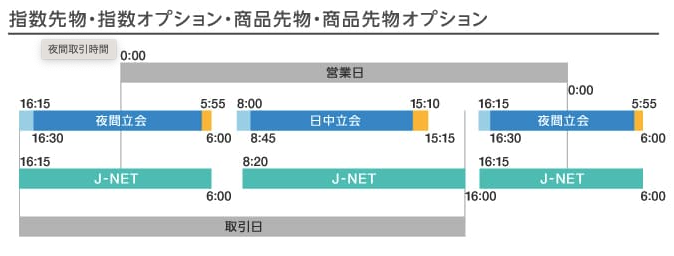

Date列が20230920の場合は、2023年9月19日のNight Sessionと9月20日のDay Sessionということになります。

### 銘柄コード（Code）について
[参考URL](https://www.jpx.co.jp/sicc/securities-code/nlsgeu0000032d48-att/sakimono230529.pdf)



以下の画像にあるように、銘柄コードの９桁にはそれぞれこのような意味があります。
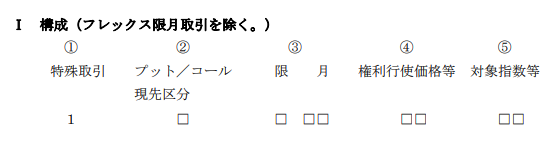

②のプット/コール、現先区分については、日経225OPであれば、  
プットオプションであれば、`3`もしくは`8`、コールオプションであれば、`4`もしくは`9`となります。

③の限月については、年を表す1桁と月を表す2桁からなり、年については、それぞれ以下の規則的な表し方となっています。

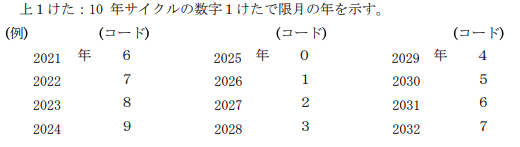

④の権利行使価格については、日経225OPであれば、例えば26,250円の権利行使価格であれば、`62`、27,000円の権利行使価格であれば、`70`といったように規則的に与えられる。

⑤の対象指数等については、日経225OPであれば、`18`で固定となっています。

上記を踏まえると、`138100018`という銘柄コードは、

` 1 | 3 | 8 | 10 | 00 | 18 `といったように分けられ、  
` 先物、オプション | プット | 2023年 | 10月 | 30000円 | 日経225 `と読み取ることができ、  
`日経225OPの2023年10月限の権利行使価格30,000円のプットオプション`ということになります。


### 四本値について(Open, High, Low, Close)

上述のとおり、OP市場では、夜間（Night Session）及び日中（Day Session）の2つに分かれています。  
J-Quants APIのオプション四本値APIでは、これらに加え、取引日を通してのWholeDayという日通しの四本値も取得可能です。

###  建玉（Open Interest）
[参考URL](https://www.jpx.co.jp/ose-toshijuku/column/kabuop_knowledge/07.html)



建玉とは、権利・義務関係が残っているオプションの数量（ポジション）のこと。  
現物株と異なり、先物やオプションでは買いもしくは売りで約定した場合には、反対売買等を行って権利・義務関係を解消しない限り、満期日まで買い手と売り手の関係が継続する。

### 取引高(Volume)・取引代金（TurnoverValue）・立会内取引高（Volume(OnlyAuction)）
[参考URL](https://www.jpx.co.jp/derivatives/rules/j-net/index.html)

取引高・取引代金については、基本的に現物株と同様に取引された数量及び代金を表します。  
立会内取引高とは、取引高のうち、J-NET市場(*)における取引高を含まないものを表します。

(*) J-NET取引は、大阪取引所の競争売買市場から独立したJ-NET市場において行う、立会によらない先物・オプション取引をいいます。

### 限月（Contract Month）、取引最終年月日（Last Trading Day）及び SQ日（Special Quotation Day）
[参考URL](https://www.jpx.co.jp/derivatives/products/domestic/225options/02.html)

(限月)  
オプション取引は、定められた期日（取引最終日）まで行われますが、これを限月取引といいます。  
日経225オプションでは、以下のように主に27の限月取引が並行して行われます。

1. 8年先までの6月と12月の直近16限月
2. 1年6か月先までの3月と9月の直近3限月
3. 3月、6月、9月、12月以外の直近8限月

（取引最終年月日）  
取引最終年月日は、各限月の第2金曜日の前営業日に終了する取引日と規則にて定められています。  
例）2023年10月限の銘柄の場合、取引最終日は、2023年10月の第2金曜日（13日）の前日である10月12日となります。

（SQ日）  
SQ(*)日とは、具体的には取引最終日の翌営業日となります。
> (*) SQ（特別清算）数値とは、株価指数先物取引の最終決済や株価指数オプションの権利行使の際に利用される数値のことをいい、SQ値（Special Quotation）ともいいます。
日経225先物、日経225mini、日経225オプション取引の場合、限月の第2金曜日の日経平均株価（日経225）構成銘柄の始値に基づいて算出され、その日の大引け後に大阪取引所から公表されます。

### 権利行使価格（Strike Price）
[参考URL](https://www.jpx.co.jp/derivatives/products/domestic/225options/02.html)

オプション取引で、原資産を買ったり、売ったりする権利を行使できる予め決められた価格のこと。  
日経225オプション取引では、権利行使価格は、当初250円の刻みでアット・ザ・マネーを中心に上下16種類設定されますが、  
残存期間が3か月となった時点から、125円の刻みで存在するように追加設定されます。

## オプション清算価格・理論価格等

### 緊急取引証拠金発動区分（Emergency Margin Trigger Division）
[参考URL](https://www.jpx.co.jp/jscc/seisan/sakimono/shokokin_seido/shokokin.html)



緊急取引証拠金が発動となった場合には、`001`が、通常の清算価格算出時には`002`が入ります。

> 緊急取引証拠金とは、毎取引日における午後１時時点において相場があらかじめ定められた範囲を超えて変動した場合等に発動されるもので、清算参加者に対し当日の午後4時までに清算参加者自己分としての追加での預託を求めます。

> 証拠金とは、取引により損失が生じた場合に備え、損失をカバーするために事前に預けておく担保のこと。
オプションの売り手は価格変動により損失が大きくなる可能性があるため、このような制度がある。
https://www.jpx.co.jp/derivatives/rules/margin/outline/index.html

### 清算値段（Settlement Price）


先物取引やオプション取引などにおいて日々値洗いや証拠金計算の際などに使用する値段のことをいいます。

### 理論価格（Theoretical Price）


オプション価格は価格決定モデルを使って理論価格を算出することができます。この理論価格はボラティリティという変数により大きく左右されます。  
ブラック-ショールズ・モデルという、オプションの価格を算出するのに用いられる代表的なモデルで、  
`原資産価格`、`権利行使価格`、`ボラティリティ`、`残存期間`、`金利`、`配当利回り`の6つの値からオプションの理論価格を算出しています。

[オプション価格計算ツール](https://oseopc-cloud.qri.jp/)がOSEより提供されています。

### 基準ボラティリティ（Base Volatility）


アット・ザ・マネー（ATM）のプット及びコールそれぞれのインプライドボラティリティの中間値

[ATMとは？ 参考URL](https://www.jpx.co.jp/ose-toshijuku/column/kabuop_knowledge/05.html)

### 原証券価格（underlying Price）


オプション四本値APIにおいては、原資産は日経225指数であるため、原証券価格は日経225指数の当日の終値が入力されています。

### IV（Inplied Volatility）
[参考URL](https://www.jpx.co.jp/ose-toshijuku/column/futures_option/option/03.html)

実際に取引されているオプション価格から算出された原資産の変動率（ボラティリティ）のことで、「予想変動率」ともいいます。  
これは重要な経済指標が大きく変わったり、政情不安が起きたりすると株価の変動を予想して大きくなります。  
オプション取引は「ボラティリティ取引」ともいわれるように、ボラティリティはオプションの価値を決める重要な尺度です。

### 理論価格計算用金利（Interest Rate）
[参考URL](https://www.jbatibor.or.jp/rate/)

理論価格を計算する際に使用している金利であり、全銀協の日本円TIBORレートを使用しています。  
それぞれの限月に応じ、３か月や６か月金利等を使用しています。